In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import os
# import the path
path = os.path.abspath(os.path.join("..", "01_get_the_data", "spy_historical_data.csv"))

In [35]:
# Load the CSV
df = pd.read_csv(path)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Show the result
df.head()

,datetime,SPY
0,2021-08-31 16:30:00,451.56
1,2021-09-01 16:30:00,451.80
2,2021-09-02 16:30:00,453.19
3,2021-09-03 16:30:00,453.08
4,2021-09-07 16:30:00,451.46


In [ ]:
# Calculate simple returns with pct_change()
simple_returns = df['SPY'].pct_change().fillna(0)

# Calculate log returns
log_returns = (1 + simple_returns).apply(np.log)

# Cumulative sum of simple returns (not correct for compounding)
cumsum_simple = simple_returns.cumsum()

# Cumulative product of simple returns (correct for compounding)
cumprod_simple = (1 + simple_returns).cumprod() - 1

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()
cumprod_log = np.exp(cumsum_log) - 1

# print("Simple returns:\n", simple_returns.round(4).to_list())
# print("Cumulative sum (simple):\n", cumsum_simple.round(4).to_list())
# print("Cumulative product (simple):\n", cumprod_simple.round(4).to_list())
# print("Log returns:\n", log_returns.round(4).to_list())
# print("Cumulative sum (log):\n", cumsum_log.round(4).to_list())
# print("Exp(cumsum(log)) - 1:\n", cumprod_log.round(4).to_list())

Simple returns:
 [0.0, 0.0005, 0.0031, -0.0002, -0.0036, -0.0012, -0.0043, -0.0079, 0.0026, -0.0054, 0.0084, -0.0016, -0.0129, -0.0167, -0.0009, 0.0098, 0.0122, 0.0016, -0.0029, -0.0202, 0.0017, -0.0122, 0.0119, -0.0129, 0.0104, 0.0042, 0.0086, -0.0018, -0.0072, -0.0025, 0.0036, 0.0168, 0.0076, 0.003, 0.0077, 0.0039, 0.0026, -0.001, 0.0054, 0.0009, -0.0044, 0.0096, 0.002, 0.0017, 0.004, 0.0061, 0.0047, 0.0035, 0.0009, -0.0033, -0.008, 0.0003, 0.0075, 0.0003, 0.004, -0.0024, 0.0034, -0.0018, -0.0028, 0.0013, 0.0027, -0.0223, 0.0123, -0.0195, -0.0111, 0.0153, -0.0087, 0.0118, 0.0207, 0.0026, -0.0068, 0.0094, -0.0089, -0.0069, 0.0156, -0.0088, -0.0141, -0.0106, 0.0178, 0.01, 0.0062, 0.0142, -0.0008, 0.0013, -0.0028, -0.0025, 0.0058, -0.0003, -0.0192, -0.0009, -0.004, -0.0012, 0.0091, 0.0027, -0.0138, 0.0004, -0.0177, -0.0104, -0.0111, -0.0196, 0.0042, -0.0122, -0.0025, -0.0049, 0.0248, 0.018, 0.0068, 0.0097, -0.0235, 0.0047, -0.0032, 0.0082, 0.0146, -0.018, -0.0197, -0.0033, 0.0161, 0.001

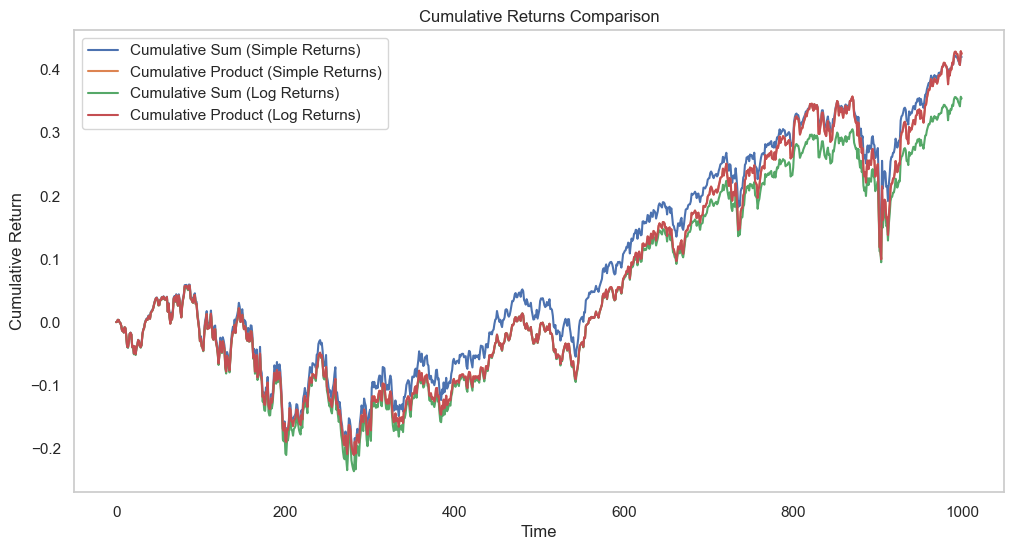

In [ ]:
# plot cumsum_simple, cumprod_simple, cumsum_log and cumprod_log
# Set the style
plt.figure(figsize=(12, 6))
plt.plot(cumsum_simple, label='Cumulative Sum (Simple Returns)')
plt.plot(cumprod_simple, label='Cumulative Product (Simple Returns)')
plt.plot(cumsum_log, label='Cumulative Sum (Log Returns)')
plt.plot(cumprod_log, label='Cumulative Product (Log Returns)')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

## Explanation of Returns Calculations
- **Simple returns**: The percentage change between each price and the previous one. It measures the direct change from one period to the next.
- **Cumulative sum of simple returns (`cumsum_simple`)**: Adds up the simple returns over time, but does not account for compounding. This can overstate the total return for longer periods.
- **Cumulative product of simple returns (`cumprod_simple`)**: Multiplies the returns, correctly compounding them over time. This gives the true total return, including the effect of earning returns on previous returns.
- **Log returns (`log_returns`)**: The logarithm of (1 + simple return). Log returns are additive over time, which makes them useful for mathematical analysis and modeling.
- **Cumulative sum of log returns (`cumsum_log`)**: Sums the log returns over time. If you exponentiate this sum, you get the compounded return.
- **Cumulative product of log returns (`cumprod_log`)**: Equivalent to `cumprod_simple`, but calculated using log returns. It also represents the compounded return over time.